## Function Creation

#### import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

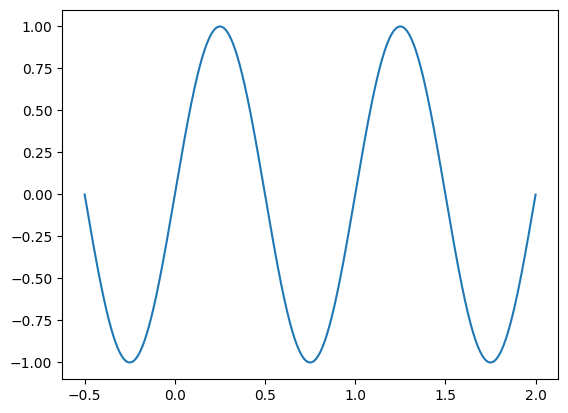

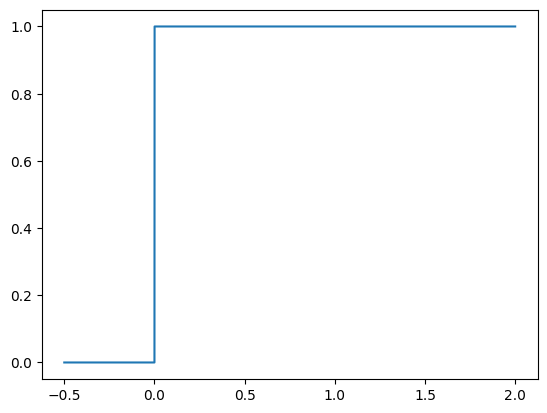

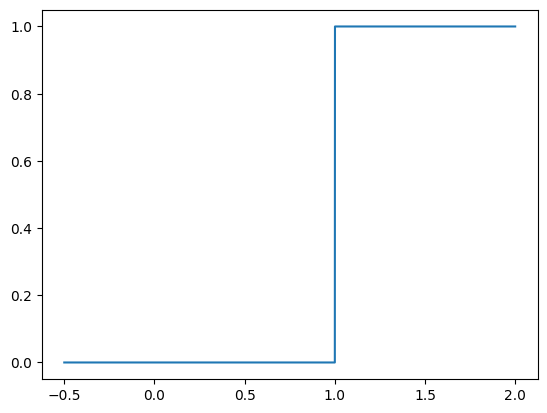

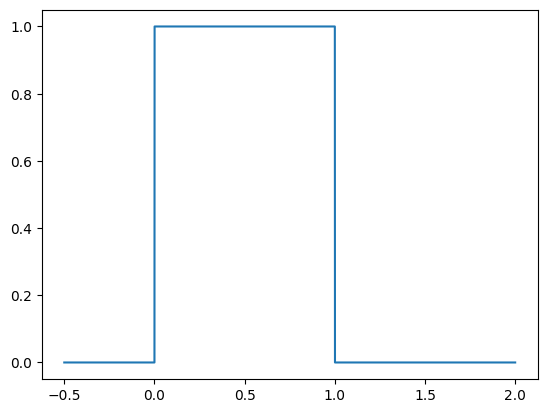

In [112]:
class Time:
    def __init__(self,duration):
        self.duration = duration
        self.dt = duration / 10000
        self._series = np.arange(-duration*0.25,duration,self.dt)
        # self.dt = duration / (10000 * 1.25)
        # self._series = [self.dt * i for i in range(-250,10000,1)]
        # dt,series
        
    @property
    def series(self):
        return self._series
    
    def __len__(self):
        return len(self._series)
    
    @property
    def len_positive(self):
        return int(len(self._series) * 0.8)

    # def time_series_gen(self,duration):
    #     dt = duration / 1000 * 1.25
    #     series = [dt * i for i in range(-250,1000,1)]
    #     return dt,series

class Unit:
    def __init__(self,t0,time : Time) -> None:
        self.t0 = t0
        self.tS = time
        length = len(self.tS)
        self._series = [1 if self.tS.series[i] > -t0 else 0 for i in range(length)]
    
    @property 
    def series(self):
        return self._series
    
    def plot(self):
        fig,ax = plt.subplots()
        ax.plot(self.tS.series,self._series)
        
    def __len__(self):
        return len(self._series)
    
    def __add__(self,S2):
        # print()
        returnVal = Unit(self.t0,self.tS)
        returnVal._series = [self._series[i] + S2.series[i] for i in range(len(self.series))]
        return returnVal
    
    def __sub__(self,S2):
        returnVal = Unit(self.t0,self.tS)
        returnVal._series = [self._series[i] - S2.series[i] for i in range(len(self.series))]
        return returnVal
    

class Sine:
    def __init__(self,freq,time : Time) -> None:
        self.freq = freq
        self.tS = time
        length = self.tS.len_positive
        self._series = [np.sin(2 * np.pi * self.freq * self.tS.series[i]) for i in range(len(self.tS))]
    
    @property 
    def series(self):
        return self._series
    
    def plot(self):
        fig,ax = plt.subplots()
        ax.plot(self.tS.series,self._series)
        
    def __len__(self):
        return len(self._series)
    
    def __add__(self,S2):
        # print()
        returnVal = Time(self.tS.duration)
        returnVal._series = [self._series[i] + S2.series[i] for i in range(len(self.series))]
        return returnVal
        # returnVal = Sine(self.freq,self.tS)
        # returnVal._series = [self._series[i] + S2.series[i] for i in range(len(self.series))]
    
    def __sub__(self,S2):
        returnVal = Time(self.tS.duration)
        returnVal._series = [self._series[i] - S2.series[i] for i in range(len(self.series))]
        return returnVal
    

time1 = Time(2)
unit1 = Unit(0,time1)
unit2 = Unit(-1,time1)
unit3 = unit1 - unit2
sin1 = Sine(1,time1)
sin1.plot()
unit1.plot()
unit2.plot()
unit3.plot()
# print(len(unit1))

In [ ]:
unit1.plot()
unit2.plot()
unit3.plot()
unit4.plot()
# print(len(unit1))